In [2]:
import numpy as np
import torch

In [3]:
n=int(1e4)
N=5
d=100
k=10

In [4]:
def generate_data(n_samples, n_spheres, ambient_dim, manifold_dim, noise_std):
        data = []
        for _ in range(n_spheres):
                new_data = torch.randn((n_samples, manifold_dim+1))
                norms = torch.linalg.norm(new_data, dim=1)
                new_data = new_data / norms[:,None]

                # random isometric embedding
                embedding_matrix = torch.randn((ambient_dim, manifold_dim+1))
                q, r = np.linalg.qr(embedding_matrix)
                q = torch.from_numpy(q)

                # embed new_data
                new_data = (q @ new_data.T).T

                # add noise
                new_data = new_data + noise_std * torch.randn_like(new_data)
                data.append(new_data)

        data = torch.concat(data, dim=0)
        return data

In [5]:
data = generate_data(n, N, d, k, 0)

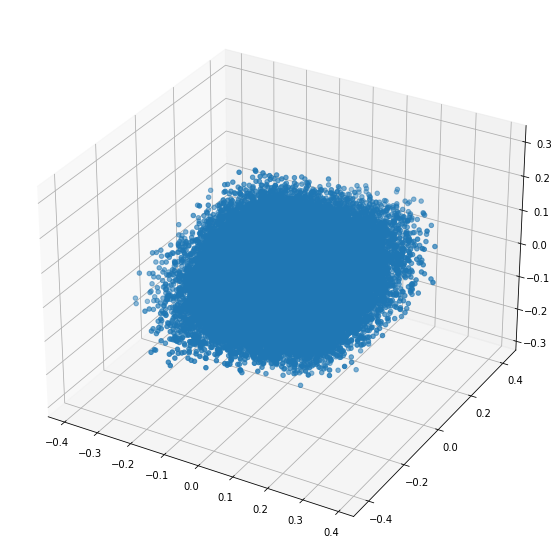

In [6]:
from matplotlib import pyplot as plt
plt_data = data.numpy()
fig, ax = plt.subplots(figsize=(10,10), subplot_kw=dict(projection='3d'))
ax.scatter(plt_data[:,0], plt_data[:,1], plt_data[:,2])
fig.show()

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components='mle')
pca.fit(plt_data)
pca.n_components_

55

In [12]:
print(np.linalg.norm(plt_data, axis=1).mean().item())
print(np.linalg.norm(plt_data, axis=1).min().item())
print(np.linalg.norm(plt_data, axis=1).max().item())

1.0
0.9999998211860657
1.0000001192092896
